<a href="https://colab.research.google.com/github/SamanMansoor/FYP-Ocular-dieases-predection/blob/main/ocular_dieases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from skimage import exposure, filters, color
import numpy as np
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans
import cv2
import numpy as np
import os

from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras import layers, Sequential

In [ ]:
ddr_csv_file = pd.read_csv(r'DR_grading.csv')
# ddr_csv_file.head()
paths = ddr_csv_file.iloc[:, 0:1].values
label = ddr_csv_file.iloc[:, 1:2].values
# base path of imges folder
# base_path = "/kaggle/input/ddrdataset/DR_grading/DR_grading/"
y_labels = ddr_csv_file['diagnosis']
y_labels

0        0
1        0
2        0
3        0
4        0
        ..
12517    4
12518    4
12519    4
12520    4
12521    4
Name: diagnosis, Length: 12522, dtype: int64

In [ ]:
def loadImage(path):
    # path ="E:/Study/FYP/DataSet/DR_grading/DR_grading/007-4890-300.jpg"    # accurate res 2 actual 2
    # path ="E:/Study/FYP/DataSet/DR_grading/DR_grading/007-2852-100.jpg"

    image = cv2.imread(path)
    dim = (256, 256)
    image  = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
    image = np.array([image.astype('float32')/255])
    # image = np.squeeze(image)
    return image

In [ ]:

    Image_Size = 256
    Channels = 3
    input_shape = (Image_Size, Image_Size, Channels)

    cnn = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(128, kernel_size=(3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(800, activation='softmax'),
    ])
    cnn.build(input_shape=input_shape)


In [ ]:
def extractFeatureFromImageUsingCNN(img):

#     image = np.squeeze(img)
    image = np.expand_dims(img, axis=0)

    features = cnn.predict(image)
#     print(features.shape)
    return features

In [ ]:

for filename in paths:
  print(filename[0])
  break

20170413102628830.jpg


In [ ]:
index = 0
features = []
y_train = []
for filename in paths:
    # Load the image

    if(index % 100 == 0):
        print(index)
    img = loadImage(base_path + filename[0])
#     print(img[0].shape)
    fet = extractFeatureFromImageUsingCNN(img[0])
    features.append(fet)
    y_train.append(label[index][0])

    index = index + 1


print('done')
print(index)

0
1/1 [==============================] - 0s 220ms/step
100
1/1 [==============================] - 0s 213ms/step
200
1/1 [==============================] - 0s 220ms/step
300
1/1 [==============================] - 0s 219ms/step
400
1/1 [==============================] - 0s 217ms/step
500
1/1 [==============================] - 0s 226ms/step
600
1/1 [==============================] - 0s 219ms/step
700
1/1 [==============================] - 0s 220ms/step
800
1/1 [==============================] - 0s 220ms/step
900
1/1 [==============================] - 0s 222ms/step
1000
1/1 [==============================] - 0s 216ms/step
1100
1/1 [==============================] - 0s 228ms/step
1200
1/1 [==============================] - 0s 221ms/step
1300
1/1 [==============================] - 0s 221ms/step
1400
1/1 [==============================] - 0s 218ms/step
1500
1/1 [==============================] - 0s 220ms/step
1600
1/1 [==============================] - 0s 219ms/step
1700
1/1 [================

Corrupt JPEG data: 35 extraneous bytes before marker 0xd9


1/1 [==============================] - 0s 228ms/step
7900
1/1 [==============================] - 0s 224ms/step
8000
1/1 [==============================] - 0s 221ms/step
8100
1/1 [==============================] - 0s 231ms/step
8200
1/1 [==============================] - 0s 216ms/step
8300
1/1 [==============================] - 0s 231ms/step
8400
1/1 [==============================] - 0s 236ms/step
8500
1/1 [==============================] - 0s 225ms/step
8600
1/1 [==============================] - 0s 226ms/step
8700
1/1 [==============================] - 0s 218ms/step
8800
1/1 [==============================] - 0s 219ms/step
8900
1/1 [==============================] - 0s 220ms/step
9000
1/1 [==============================] - 0s 220ms/step
9100
1/1 [==============================] - 0s 215ms/step
9200
1/1 [==============================] - 0s 221ms/step
9300
1/1 [==============================] - 0s 215ms/step
9400
1/1 [==============================] - 0s 223ms/step
9500
1/1 [=========

Corrupt JPEG data: 38 extraneous bytes before marker 0xd9


1/1 [==============================] - 0s 222ms/step


Corrupt JPEG data: 34 extraneous bytes before marker 0xd9


1/1 [==============================] - 0s 224ms/step
10100
1/1 [==============================] - 0s 222ms/step
10200
1/1 [==============================] - 0s 212ms/step
10300
1/1 [==============================] - 0s 229ms/step
10400
1/1 [==============================] - 0s 230ms/step
10500
1/1 [==============================] - 0s 231ms/step
10600
1/1 [==============================] - 0s 228ms/step
10700
1/1 [==============================] - 0s 226ms/step
10800
1/1 [==============================] - 0s 221ms/step
10900
1/1 [==============================] - 0s 230ms/step
11000
1/1 [==============================] - 0s 226ms/step
11100
1/1 [==============================] - 0s 217ms/step
11200
1/1 [==============================] - 0s 220ms/step
11300
1/1 [==============================] - 0s 220ms/step
11400
1/1 [==============================] - 0s 226ms/step
11500
1/1 [==============================] - 0s 222ms/step
11600
1/1 [==============================] - 0s 231ms/step
117

In [ ]:
np.save("/kaggle/working/new_features.npy",features)

In [ ]:
curFet = np.concatenate(features, axis=0)
print(curFet.shape)


(12522, 800)


In [ ]:
np.save("/kaggle/working/new_extracted_features.npy",curFet)

In [ ]:
cnn_features = np.load(r"new_extracted_features.npy")
cnn_features.shape

(12522, 800)

In [ ]:
ddr_csv_file = pd.read_csv(r'DR_grading.csv')
# ddr_csv_file.head()
paths = ddr_csv_file.iloc[:, 0:1].values
label = ddr_csv_file.iloc[:, 1:2].values
# base path of imges folder
# base_path = "/kaggle/input/ddrdataset/DR_grading/DR_grading/"
y_labels = ddr_csv_file['diagnosis']
y_labels

0        0
1        0
2        0
3        0
4        0
        ..
12517    4
12518    4
12519    4
12520    4
12521    4
Name: diagnosis, Length: 12522, dtype: int64

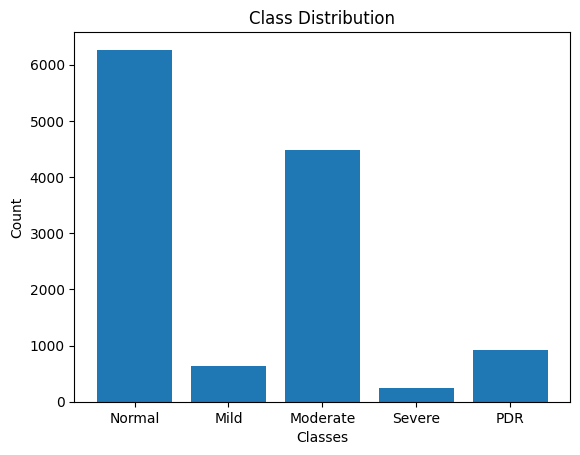

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_class_distribution(y_labels, class_names):
    class_counts = np.zeros(len(class_names))
    for label in y_labels:
        class_counts[label] += 1

    plt.bar(class_names, class_counts)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title('Class Distribution')

# Example usage:
y_labels = y_labels
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']

plt.figure()
plot_class_distribution(y_labels, class_names)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Y_labels = y_labels
features = cnn_features
label.shape


(12522, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cnn_features, Y_labels, shuffle=True, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix


In [ ]:
cf_matrix_KNN_B =""
cf_matrix_RF_B =""

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_KNN_B=cf_matrix
cf_matrix

Training time: 0.012636423110961914s
accuracy score 0.6483033932135729
error rate: 0.3516966067864271
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1231
           1       0.17      0.08      0.11       135
           2       0.61      0.61      0.61       908
           3       0.40      0.04      0.07        52
           4       0.55      0.13      0.21       179

    accuracy                           0.65      2505
   macro avg       0.48      0.34      0.35      2505
weighted avg       0.62      0.65      0.62      2505

0.6406 accuracy with a standard deviation of 0.0115


array([[1038,   11,  179,    0,    3],
       [  58,   11,   65,    0,    1],
       [ 309,   31,  550,    3,   15],
       [  25,    4,   21,    2,    0],
       [  57,    7,   92,    0,   23]], dtype=int64)

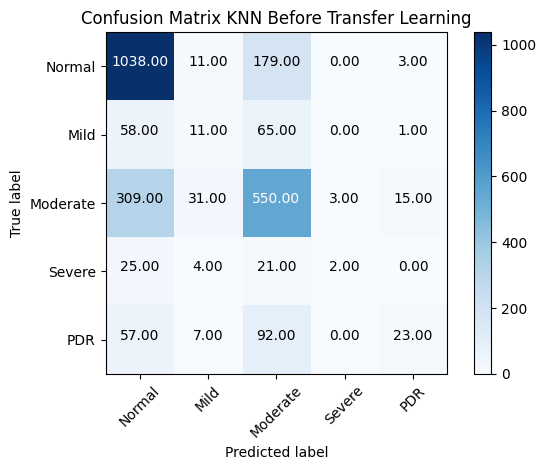

In [ ]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix KNN Before Transfer Learning')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
clf = RandomForestClassifier(max_depth=100, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=100, random_state=0)
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_RF_B = cf_matrix
cf_matrix

Training time: 33.95625901222229s
accuracy score 0.6722554890219561
error rate: 0.3277445109780439
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1231
           1       1.00      0.01      0.01       135
           2       0.59      0.68      0.63       908
           3       0.00      0.00      0.00        52
           4       0.69      0.06      0.11       179

    accuracy                           0.67      2505
   macro avg       0.60      0.32      0.31      2505
weighted avg       0.68      0.67      0.63      2505

0.6787 accuracy with a standard deviation of 0.0109


array([[1057,    0,  174,    0,    0],
       [  57,    1,   77,    0,    0],
       [ 288,    0,  615,    0,    5],
       [  18,    0,   34,    0,    0],
       [  32,    0,  136,    0,   11]], dtype=int64)

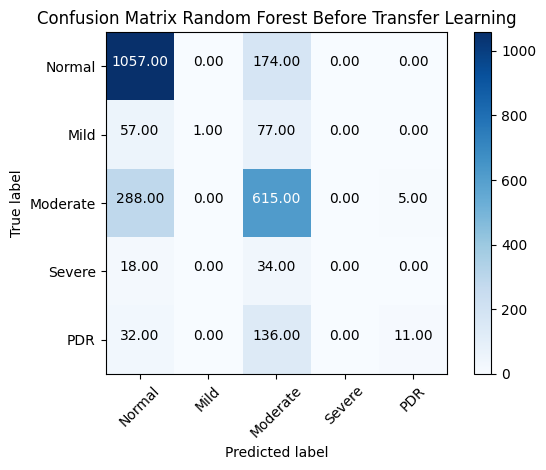

In [ ]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Random Forest Before Transfer Learning')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = GaussianNB()
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)

cf_matrix

Training time: 0.07107090950012207s
accuracy score 0.37964071856287424
error rate: 0.6203592814371257
              precision    recall  f1-score   support

           0       0.63      0.60      0.61      1231
           1       0.06      0.14      0.08       135
           2       0.42      0.12      0.19       908
           3       0.06      0.35      0.11        52
           4       0.14      0.37      0.20       179

    accuracy                           0.38      2505
   macro avg       0.26      0.32      0.24      2505
weighted avg       0.48      0.38      0.39      2505

0.3699 accuracy with a standard deviation of 0.0139


array([[737, 144, 106,  97, 147],
       [ 51,  19,  18,  20,  27],
       [331, 119, 110, 118, 230],
       [ 11,   7,   9,  18,   7],
       [ 39,  27,  17,  29,  67]], dtype=int64)

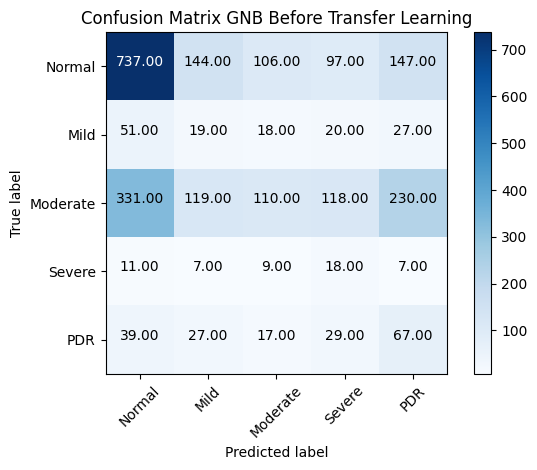

In [ ]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix GNB Before Transfer Learning')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=100, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = DecisionTreeClassifier(max_depth=100, random_state=0)
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 10.305602073669434s
accuracy score 0.5317365269461077
error rate: 0.46826347305389227
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1231
           1       0.10      0.11      0.11       135
           2       0.50      0.48      0.49       908
           3       0.05      0.06      0.05        52
           4       0.20      0.20      0.20       179

    accuracy                           0.53      2505
   macro avg       0.30      0.31      0.31      2505
weighted avg       0.53      0.53      0.53      2505

0.5359 accuracy with a standard deviation of 0.0163


array([[847,  61, 268,  15,  40],
       [ 40,  15,  63,   7,  10],
       [305,  57, 432,  27,  87],
       [ 24,   3,  18,   3,   4],
       [ 47,  11,  80,   6,  35]], dtype=int64)

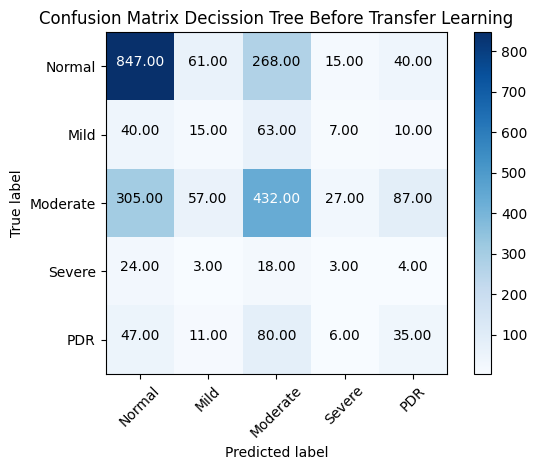

In [ ]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Decission Tree Before Transfer Learning')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LinearSVC(random_state=0, tol=1e-5)
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_svm_a = cf_matrix
cf_matrix

Training time: 4.273855447769165s
accuracy score 0.49141716566866267
error rate: 0.5085828343313373
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1231
           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       908
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00       179

    accuracy                           0.49      2505
   macro avg       0.10      0.20      0.13      2505
weighted avg       0.24      0.49      0.32      2505

0.5004 accuracy with a standard deviation of 0.0110


array([[1231,    0,    0,    0,    0],
       [ 135,    0,    0,    0,    0],
       [ 908,    0,    0,    0,    0],
       [  52,    0,    0,    0,    0],
       [ 179,    0,    0,    0,    0]], dtype=int64)

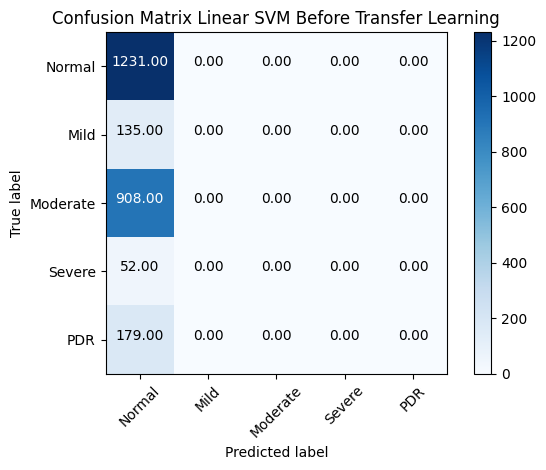

In [ ]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Linear SVM Before Transfer Learning')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(features, Y_labels)
dtPre1=KNN.predict_proba(features)

In [ ]:
import joblib
joblib.dump(KNN, '/kaggle/working/KNN_TRANSFER_NEW_19.pkl')

['/kaggle/working/KNN_TRANSFER_NEW_19.pkl']

In [ ]:
RF=RandomForestClassifier(max_depth=20,n_estimators= 10, random_state=0)
RF.fit(features, Y_labels)
dtPre2=RF.predict_proba(features)

In [ ]:
joblib.dump(RF, '/kaggle/working/RF_TRANSFER_NEW_19.pkl')

['/kaggle/working/RF_TRANSFER_NEW_19.pkl']

In [ ]:
knn_dt=pd.DataFrame(dtPre1)
rf_dt=pd.DataFrame(dtPre2)
result = pd.concat([knn_dt,rf_dt], axis=1).reindex(knn_dt.index)
result.shape

(12522, 10)

In [ ]:
# from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(result,Y_labels, test_size = 0.2, random_state =0,shuffle=True)

In [ ]:
cf_matrix_knn_a =""
cf_matrix_rf_a =""
cf_matrix_gnb_a =""
cf_matrix_dt_a =""
cf_matrix_svm_a =""

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=2)
score = cross_val_score(clf, result, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_knn_a = cf_matrix
cf_matrix

Training time: 0.061911821365356445s
accuracy score 0.9824351297405189
error rate: 0.017564870259481058
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1231
           1       0.96      0.98      0.97       135
           2       0.98      0.97      0.98       908
           3       1.00      0.96      0.98        52
           4       1.00      0.94      0.97       179

    accuracy                           0.98      2505
   macro avg       0.98      0.97      0.98      2505
weighted avg       0.98      0.98      0.98      2505

0.9797 accuracy with a standard deviation of 0.0062


array([[1226,    0,    5,    0,    0],
       [   2,  132,    1,    0,    0],
       [  19,    4,  885,    0,    0],
       [   1,    0,    1,   50,    0],
       [   2,    2,    7,    0,  168]], dtype=int64)

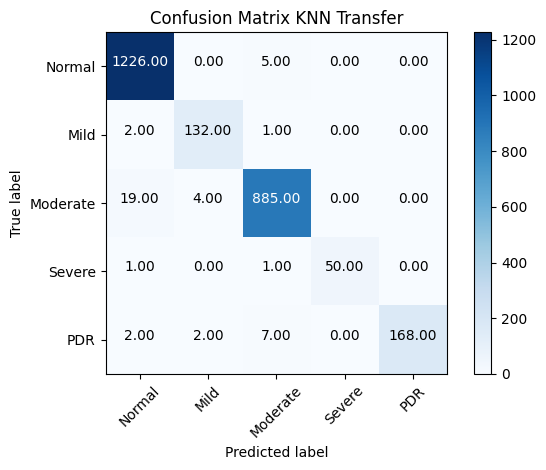

In [ ]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix KNN Transfer')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
clf = RandomForestClassifier(max_depth=100, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=100, random_state=0)
score = cross_val_score(clf, result, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_rf_a = cf_matrix
cf_matrix


Training time: 1.3104743957519531s
accuracy score 0.9864271457085828
error rate: 0.013572854291417191
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1231
           1       1.00      0.99      0.99       135
           2       0.98      0.98      0.98       908
           3       1.00      1.00      1.00        52
           4       1.00      0.96      0.98       179

    accuracy                           0.99      2505
   macro avg       0.99      0.98      0.99      2505
weighted avg       0.99      0.99      0.99      2505

0.9854 accuracy with a standard deviation of 0.0024


array([[1221,    0,   10,    0,    0],
       [   1,  133,    1,    0,    0],
       [  14,    0,  894,    0,    0],
       [   0,    0,    0,   52,    0],
       [   2,    0,    6,    0,  171]], dtype=int64)

In [ ]:
joblib.dump(clf, '/kaggle/working/RF_TRAINED_MODEL.pkl')

['/kaggle/working/RF_TRAINED_MODEL.pkl']

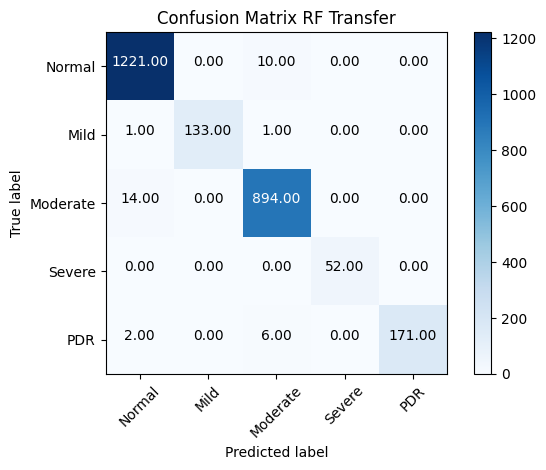

In [ ]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix RF Transfer')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LinearSVC(random_state=0, tol=1e-5)
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_svm_a = cf_matrix
cf_matrix

Training time: 0.048226118087768555s
accuracy score 0.9836327345309381
error rate: 0.016367265469061865
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1231
           1       0.98      0.96      0.97       135
           2       0.98      0.98      0.98       908
           3       1.00      0.98      0.99        52
           4       0.99      0.95      0.97       179

    accuracy                           0.98      2505
   macro avg       0.99      0.97      0.98      2505
weighted avg       0.98      0.98      0.98      2505

0.5004 accuracy with a standard deviation of 0.0112


array([[1223,    1,    7,    0,    0],
       [   3,  129,    3,    0,    0],
       [  15,    1,  891,    0,    1],
       [   0,    0,    1,   51,    0],
       [   2,    0,    7,    0,  170]], dtype=int64)

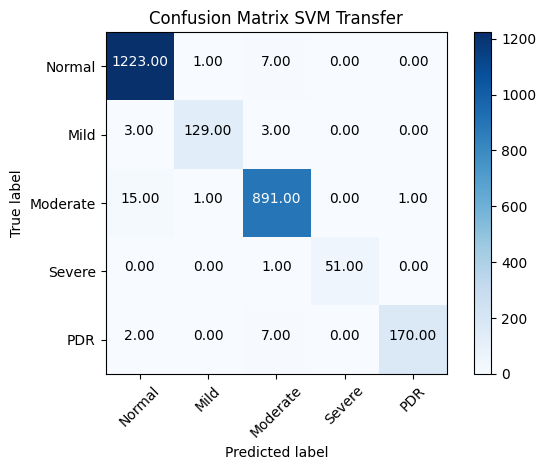

In [ ]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix SVM Transfer')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = GaussianNB()
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_gnb_a = cf_matrix
cf_matrix

Training time: 0.007001399993896484s
accuracy score 0.9640718562874252
error rate: 0.0359281437125748
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1231
           1       0.88      1.00      0.94       135
           2       0.98      0.95      0.97       908
           3       0.73      1.00      0.85        52
           4       0.91      0.97      0.94       179

    accuracy                           0.96      2505
   macro avg       0.90      0.98      0.93      2505
weighted avg       0.97      0.96      0.96      2505

0.3708 accuracy with a standard deviation of 0.0162


array([[1189,   10,   12,   10,   10],
       [   0,  135,    0,    0,    0],
       [  18,    8,  865,    9,    8],
       [   0,    0,    0,   52,    0],
       [   0,    0,    5,    0,  174]], dtype=int64)

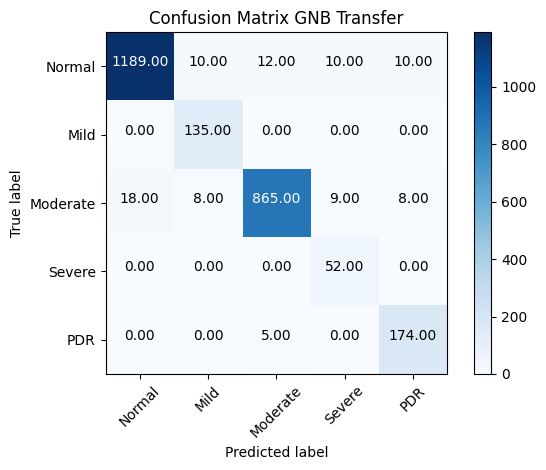

In [ ]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix GNB Transfer')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=100, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = DecisionTreeClassifier(max_depth=100, random_state=0)
score = cross_val_score(clf, features, Y_labels, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix_dt_a = cf_matrix
cf_matrix

Training time: 0.07013320922851562s
accuracy score 0.9792415169660679
error rate: 0.02075848303393213
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1231
           1       0.96      0.98      0.97       135
           2       0.97      0.98      0.97       908
           3       1.00      0.96      0.98        52
           4       1.00      0.94      0.97       179

    accuracy                           0.98      2505
   macro avg       0.98      0.97      0.98      2505
weighted avg       0.98      0.98      0.98      2505

0.5346 accuracy with a standard deviation of 0.0092


array([[1213,    2,   16,    0,    0],
       [   1,  132,    2,    0,    0],
       [  16,    2,  890,    0,    0],
       [   0,    1,    1,   50,    0],
       [   1,    1,    9,    0,  168]], dtype=int64)

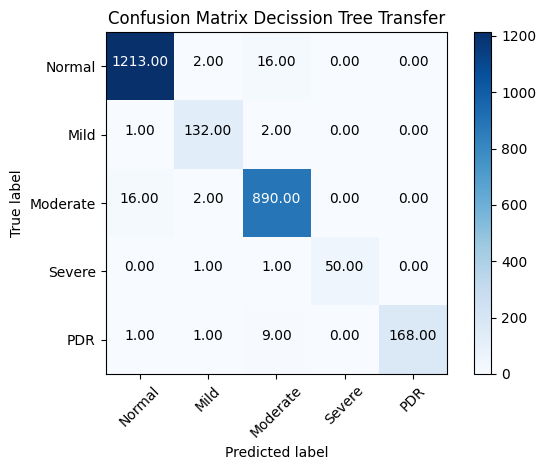

In [ ]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix Decission Tree Transfer')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
# Compute and display the confusion matrix
cf_matrix = confusion_matrix(Y_test, dtP3)
# print(cf_matrix)

# Plot the confusion matrix
class_names = ['Normal', 'Mild', 'Moderate', 'Severe', 'PDR']
plt.figure()
plot_confusion_matrix(cf_matrix, classes=class_names)
plt.show()

In [ ]:
# cf_matrix_knn_a.shape  # Model 1
# cf_matrix_rf_a.shape  # Model 2
# cf_matrix_gnb_a.shape  # Model 3
# cf_matrix_dt_a.shape # Model 4
# cf_matrix_svm_a.shape

(5, 5)

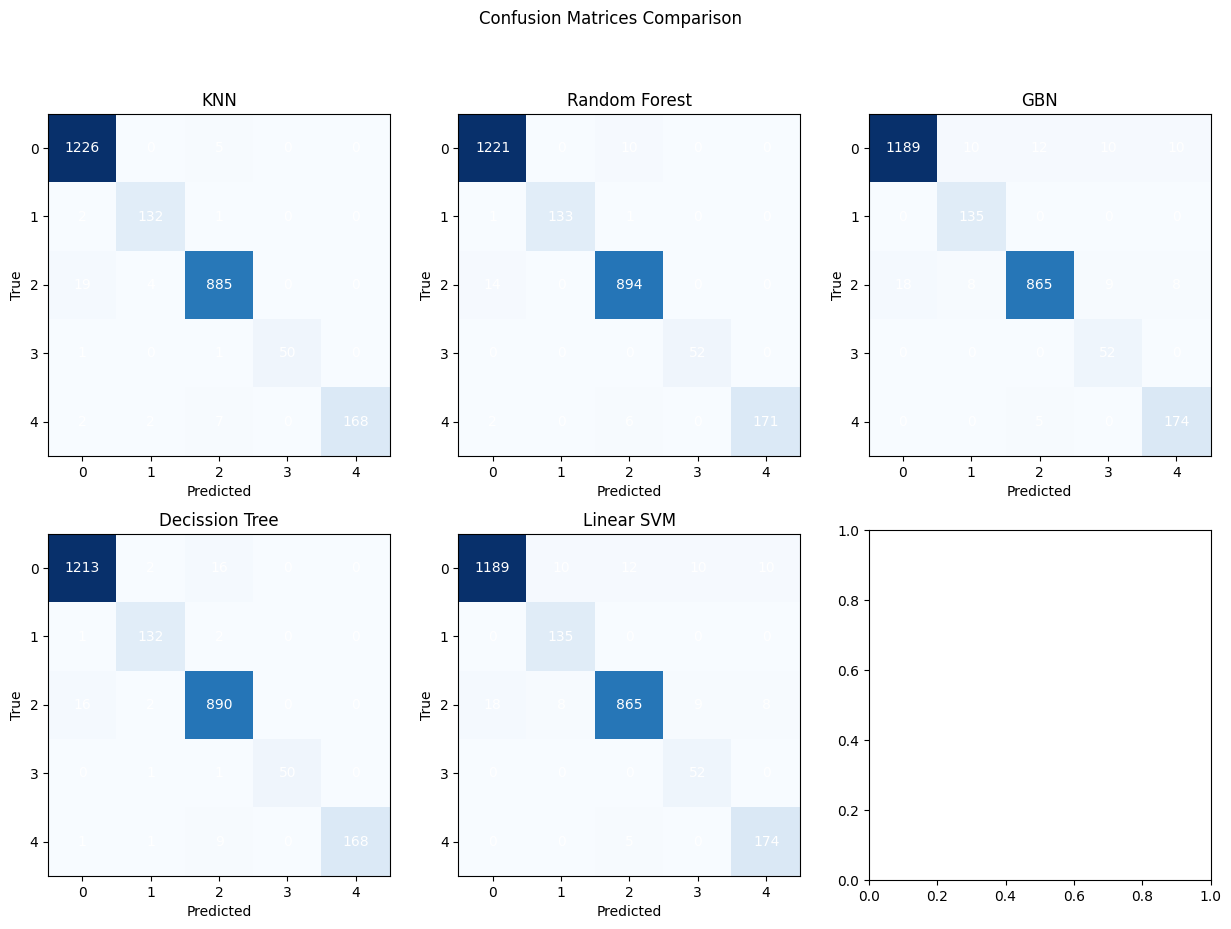

In [ ]:
confusion_matrices = [
    cf_matrix_knn_a,  # Model 1
    cf_matrix_rf_a,  # Model 2
    cf_matrix_gnb_a,  # Model 3
    cf_matrix_dt_a,  # Model 4
    cf_matrix_svm_a   # Model 5
]

model_names = ["KNN", "Random Forest", "GBN", "Decission Tree", "Linear SVM"]

# Plotting the confusion matrices
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Confusion Matrices Comparison")
count = 0
for i, ax in enumerate(axs.flatten()):
    # Get the confusion matrix for the current model
    cm = confusion_matrices[count]


    # Plot the confusion matrix as a heatmap
    im = ax.imshow(cm, cmap='Blues')

    # Add labels, title, and colorbar
    ax.set_title(model_names[count])
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[0]))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    count+=1


    # Add values inside the heatmap cells
    for i in range(5):
        for j in range(5):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="w")
    if(count == 5):
        break
# Adjust the spacing between subplots
# plt.tight_layout()
plt.show()